# MRI Histology Lesion Analysis
This notebook presents a comparison of MRI lesion reads compared to whole mount histology reads, comparing index lesions, clinically-significant lesion and benign confounders, including atrophy and BPH.

This notebook replaces the ```mri_histology_analysis.py``` script and the corresponding ```mri_histology_analysis.md``` output that were becoming really cumbersome with the different subanalyses.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

# graphicsMode = 'paper'
graphicsMode = 'presentation'

saveFigType = {'paper': 'eps',
               'presentation': 'png'
               }

from mr_analysis import MRAnalysis
invivo_path = '/luscinia/ProstateStudy/invivo'

from IPython.display import display, Image
import matplotlib.pyplot as plt

class countTotalPercent:
    """
    calculate percentage (p) from 2 input ints, count (c) and total (t)
    used for printed output below
    """
    def __init__(self, c, t):
        self.c = c
        self.t = t
        self.p = 100*float(c)/float(t)
        
# open LaTeX source file with variables to read into Results section directly so that they don't have to get manually updated
# for each subsequent re-anlaysis iteration
analysis_results = open('analysis_results.tex', 'w')
analysis_results.write('% DO NOT MANUALLY EDIT THIS FILE!\n')
analysis_results.write('% GENERATED BY mri_histology_lesion_analysis.ipynb\n')

def write_analysis_result(varname, value, analysis_results=analysis_results):
    """
    write a new LaTeX command with specified variable name and value
    """
    if type(value) is float:
        value = str(round(value, 1))
    analysis_results.write('\\newcommand{\%s}{%s}\n' % (varname, value))

Populating the interactive namespace from numpy and matplotlib


##Valid Study Subjects

In [2]:
ValidPatientNums = []
for n, p in enumerate(range(56, 107)):
    P = MRAnalysis(p, invivo_path)
    if P.valid:
        ValidPatientNums.append(p)
    
print "%i of %i study subjects valid" % (len(ValidPatientNums), n+1)
print "Valid study subjects: %s" %  ValidPatientNums

No Histology Index Lesion, P70
27 of 51 study subjects valid
Valid study subjects: [56, 58, 59, 60, 62, 63, 64, 65, 68, 70, 71, 72, 73, 78, 79, 83, 84, 86, 87, 90, 91, 93, 94, 95, 96, 99, 104]


##Index Lesions
Index lesions were considered matched if they existed in the nearest-neighbor set of the histology-identified region.  An exact region match is not presented since there is so much uncertainty with the exact region for both the MRI image and the histology.  There was at least one case that did not have an index lesion because the only PCA did not meet the threshold for clinical significance.

No Histology Index Lesion, P70
MRI nearest-neighbor index PCA sensitivity: 25/26 (96%)
MRI-detected index PCA study subjects: [(56, 'anterior'), (58, 'posterior'), (59, 'posterior'), (60, 'posterior'), (62, 'posterior'), (63, 'posterior'), (64, 'posterior'), (65, 'posterior'), (68, 'posterior'), (71, 'posterior'), (72, 'posterior'), (73, 'posterior'), (78, 'anterior'), (79, 'posterior'), (83, 'posterior'), (84, 'posterior'), (87, 'posterior'), (90, 'anterior'), (91, 'posterior'), (93, 'posterior'), (94, 'posterior'), (95, 'posterior'), (96, 'posterior'), (99, 'posterior'), (104, 'posterior')]
MRI-missed study subjects: [(86, 'posterior')]
MRI POSTERIOR index PCA lesion sensitivity: 22/23 (96%)
MRI ANTERIOR index PCA lesion sensitivity: 3/3 (100%)


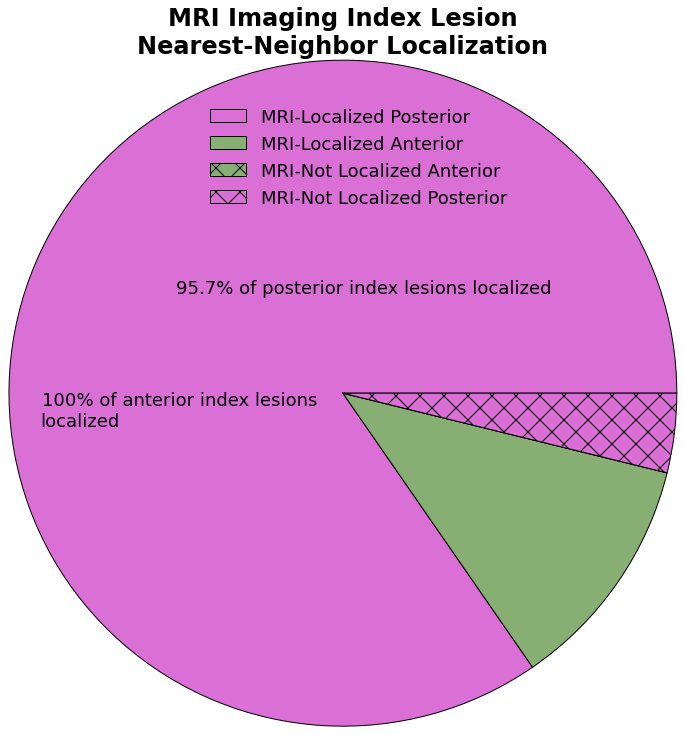

In [8]:
IndexMatch = []
IndexMiss = []
for p in ValidPatientNums:
    P = MRAnalysis(p, invivo_path)
    if 'index' in P.histology:
        if P.histology['index'] is not None:
            if P.index_match['nn']:
                IndexMatch.append((p, P.histology['index']['location']))
            else:
                IndexMiss.append((p, P.histology['index']['location']))
        
MRI_Index = countTotalPercent(len(IndexMatch), len(IndexMatch)+len(IndexMiss))

print "MRI nearest-neighbor index PCA sensitivity: %i/%i (%.f%%)" % (MRI_Index.c, MRI_Index.t, MRI_Index.p)
write_analysis_result('mriIndexSensitivity', MRI_Index.p)
print "MRI-detected index PCA study subjects: %s" % IndexMatchNo Histology Index Lesion, P70
MRI nearest-neighbor index PCA sensitivity: 25/26 (96%)
MRI-detected index PCA study subjects: [(56, 'anterior'), (58, 'posterior'), (59, 'posterior'), (60, 'posterior'), (62, 'posterior'), (63, 'posterior'), (64, 'posterior'), (65, 'posterior'), (68, 'posterior'), (71, 'posterior'), (72, 'posterior'), (73, 'posterior'), (78, 'anterior'), (79, 'posterior'), (83, 'posterior'), (84, 'posterior'), (87, 'posterior'), (90, 'anterior'), (91, 'posterior'), (93, 'posterior'), (94, 'posterior'), (95, 'posterior'), (96, 'posterior'), (99, 'posterior'), (104, 'posterior')]
MRI-missed study subjects: [(86, 'posterior')]
MRI POSTERIOR index PCA lesion sensitivity: 22/23 (96%)
MRI ANTERIOR index PCA lesion sensitivity: 3/3 (100%)
print "MRI-missed study subjects: %s" % IndexMiss

# posterior index lesion sub-analysis
TotalIndexPosteriorMatch = len([i for i, j in enumerate(IndexMatch) if j[1] == 'posterior'])
TotalIndexPosteriorMiss = len([i for i, j in enumerate(IndexMiss) if j[1] == 'posterior'])
TotalIndexPosterior = TotalIndexPosteriorMatch + TotalIndexPosteriorMiss
MRI_posterior = countTotalPercent(TotalIndexPosteriorMatch, TotalIndexPosterior)
print "MRI POSTERIOR index PCA lesion sensitivity: %i/%i (%.f%%)" % (MRI_posterior.c, MRI_posterior.t, MRI_posterior.p)
write_analysis_result('mriPosteriorIndexSensitivity', MRI_posterior.p)

# anterior index lesion sub-analysis
TotalIndexAnteriorMatch = len([i for i, j in enumerate(IndexMatch) if j[1] == 'anterior'])
TotalIndexAnteriorMiss = len([i for i, j in enumerate(IndexMiss) if j[1] == 'anterior'])
TotalIndexAnterior = TotalIndexAnteriorMatch + TotalIndexAnteriorMiss
MRI_anterior = countTotalPercent(TotalIndexAnteriorMatch, TotalIndexAnterior)
print "MRI ANTERIOR index PCA lesion sensitivity: %i/%i (%.f%%)" % (MRI_anterior.c, MRI_anterior.t, MRI_anterior.p)
write_analysis_result('mriAnteriorIndexSensitivity', MRI_anterior.p)

# generate some pie charts
labels = ['MRI-Localized Posterior', 'MRI-Localized Anterior', 'MRI-Not Localized Anterior', 'MRI-Not Localized Posterior']
pie_colors = {'presentation': ['orchid', 'sage', 'sage', 'orchid'],
              'paper': ['lightgray', 'darkgray', 'darkgray', 'lightgray']
              }
colors = pie_colors[graphicsMode]

plt.figure(figsize=(12,12))
slices = [MRI_posterior.c, MRI_anterior.c, MRI_anterior.t-MRI_anterior.c, MRI_posterior.t-MRI_posterior.c]
patches, texts = plt.pie(slices, colors=colors)
plt.axis('equal')
plt.title('MRI Imaging Index Lesion\nNearest-Neighbor Localization', fontsize=24, fontweight='bold')
for i in range(0,len(texts)):
    texts[i].set_fontsize(18)
patches[2].set_hatch('x')
patches[3].set_hatch('x')
plt.legend(patches, labels, fontsize=18, loc='upper center', frameon=False, bbox_to_anchor=(0.525, 0.95))
#plt.text(-0.5, 0.4, '79% of all index lesions detected', fontsize=18, color='black')
plt.text(-0.5, 0.3, '%.1f%% of posterior index lesions localized' % MRI_posterior.p, fontsize=18, color='black')
plt.annotate('%.f%% of anterior index lesions\nlocalized' % MRI_anterior.p, 
             xy=(0.075, -0.55),
             xytext=(-0.9,-0.1),
             fontsize=18)
savefig('MRI_IndexLesionSensitivity.%s' % saveFigType[graphicsMode], dpi=600)

###Missed Case Histology
For this case, MRI called 12p while Histology called 1p. From the histology images below, there appears to be some cancer in 12p but the major focus of the tumor is in the base (bilateral with Gleason 7 at 1p region). 

/luscinia/ProstateStudy/invivo/Patient86/Histology/Images/montage.png


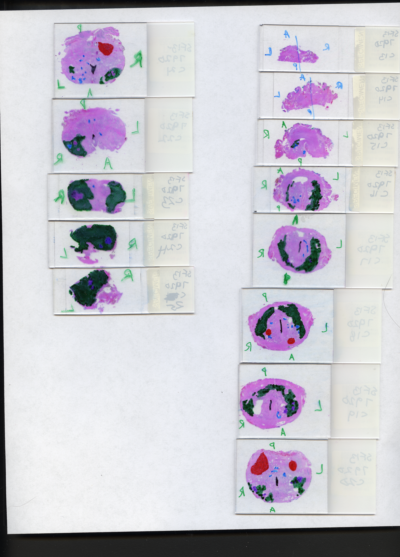

In [15]:
for p in [i for i,j in IndexMiss]:
    montage = '%s/Patient%s/Histology/Images/montage.png' % (invivo_path, p)
    print montage
    display(Image(filename=montage))

##MRI Lesion Characterization

###True Positives (Clinically-Significant PCA)

In [24]:
ClinSigMatch = []
ClinSigMatchCases = []
ClinSigMissCases = []
ClinSigMiss = []
ClinSigMatchIOS = []
ClinSigMissIOS = []

for p in ValidPatientNums:
    P = MRAnalysis(p, invivo_path)
    if P.clin_sig_match is not None:
        for yay, locat, ios in P.clin_sig_match:
            if yay is True:
                ClinSigMatch.append(locat)    
                ClinSigMatchCases.append(p)
                ClinSigMatchIOS.append(ios)
            elif yay is False:
                ClinSigMissCases.append(p)
                ClinSigMiss.append(locat)
                ClinSigMissIOS.append(ios)
                
ClinSigMatchCases = set(ClinSigMatchCases)
ClinSigMissCases = set(ClinSigMissCases)

MRItotal = len(ClinSigMatch) + len(ClinSigMiss)
MRIclinsig = countTotalPercent(len(ClinSigMatch), MRItotal)

MRIposterior = countTotalPercent(len([i for i in ClinSigMatch if i == 'posterior']), len(ClinSigMatch))     
MRIanterior = countTotalPercent(len([i for i in ClinSigMatch if i == 'anterior']), len(ClinSigMatch))
MRImissposterior = countTotalPercent(len([i for i in ClinSigMiss if i == 'posterior']), len(ClinSigMiss))     
MRImissanterior = countTotalPercent(len([i for i in ClinSigMiss if i == 'anterior']), len(ClinSigMiss))

# print and write interesting results to include in the manuscript
print "%i/%i (%.f%%) of read lesions were clinically significant" % \
    (MRIclinsig.c, MRIclinsig.t, MRIclinsig.p)
    
write_analysis_result('mriClinSig', MRIclinsig.p)
print "\tStudy subjects: %s" % ClinSigMatchCases
    
print "\t%i/%i (%.f%%) of read clinically-significant lesions were posterior" % \
    (MRIposterior.c, MRIposterior.t, MRIposterior.p)
write_analysis_result('mriClinSigPosterior', MRIposterior.p)    
    
print "\t%i/%i (%.f%%) of read clinically-significant lesions were anterior" % \
    (MRIanterior.c, MRIanterior.t, MRIanterior.p) 
write_analysis_result('mriClinSigAnterior', MRIanterior.p)

print "\t%i/%i (%.f%%) of read clinically-insignificant lesions were posterior" % \
    (MRImissposterior.c, MRImissposterior.t, MRImissposterior.p)
write_analysis_result('mriClinInsigPosterior', MRImissposterior.p)    
    
print "\t%i/%i (%.f%%) of read clinically-insignificant lesions were anterior" % \
    (MRImissanterior.c, MRImissanterior.t, MRImissanterior.p) 
write_analysis_result('mriClinInsigAnterior', MRImissanterior.p)

print "Clinically Signficant Match IOS" 
print ClinSigMatchIOS 
print "Clinically Insignificant Call IOS" 
print ClinSigMissIOS

No Histology Index Lesion, P70
34/48 (71%) of read lesions were clinically significant
	Study subjects: set([96, 65, 91, 68, 93, 72, 78, 79, 99, 83, 84, 94, 87, 56, 58, 59, 60, 90, 62, 95])
	26/34 (76%) of read clinically-significant lesions were posterior
	8/34 (24%) of read clinically-significant lesions were anterior
	11/14 (79%) of read clinically-insignificant lesions were posterior
	3/14 (21%) of read clinically-insignificant lesions were anterior
Clinically Signficant Match IOS
[3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 3, 3, 2]
Clinically Insignificant Call IOS
[1, 1, 1, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2]


###False Positives
If the MRI imaging regions of suspicion (ROS) did not contain clinically-significant, then what did they contain?

In [30]:
MRIatrophy = []
MRIbph = []
MRI_FalsePositive = []
NoHistLesion = []

for p in ValidPatientNums:
    P = MRAnalysis(p, invivo_path)
    if P.false_positive:
        MRI_FalsePositive.append([P.pnum, P.false_positive])

print "MRI False Positives:"        
print MRI_FalsePositive        
        
MRI_ClinInsigPCA = [z for x, y in MRI_FalsePositive for z in y if 'pca' in z]

if not MRI_ClinInsigPCA:
    MRI_ClinInsigPCA = None

print "Number of non-clinically significant PCA: %s" % len(MRI_ClinInsigPCA)
        
for i, j in MRI_FalsePositive:
    if 'atrophy' in j:
        MRIatrophy.append(i)
    elif 'bph' in j:
        MRIbph.append(i)
        
if not MRIatrophy:
    MRIatrophy = None
    
print "Number of study subjects with ATROPHY in ROS: %s" % len(MRIatrophy)

if not MRIbph:
    MRIbph = None

print "Number of study subjects with BPH in ROS: %s" % MRIbph

for i, j in MRI_FalsePositive:
    if 'no lesion' in j:
        NoHistLesion.append(i)       
        
if not NoHistLesion:
    NoHistLesion = None

print "Study subjects with no histologic lesions: %s" % NoHistLesion

No Histology Index Lesion, P70
MRI False Positives:
[[59, ['pca']], [62, ['atrophy']], [63, ['pca']], [64, ['pca']], [70, ['pca', 'pca']], [72, ['atrophy']]]
Number of non-clinically significant PCA: 5
Number of study subjects with ATROPHY in ROS: 2
Number of study subjects with BPH in ROS: None
Study subjects with no histologic lesions: None


###False Positive: Atrophy

/luscinia/ProstateStudy/invivo/Patient62/Histology/Images/montage.png


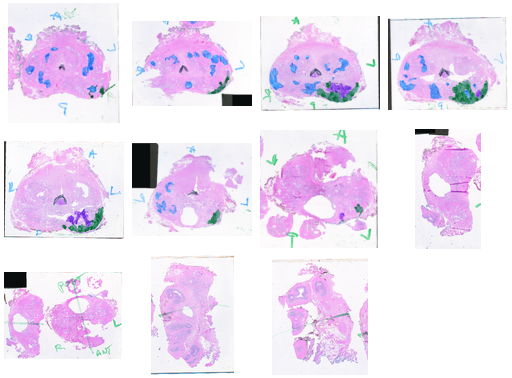

/luscinia/ProstateStudy/invivo/Patient72/Histology/Images/montage.png


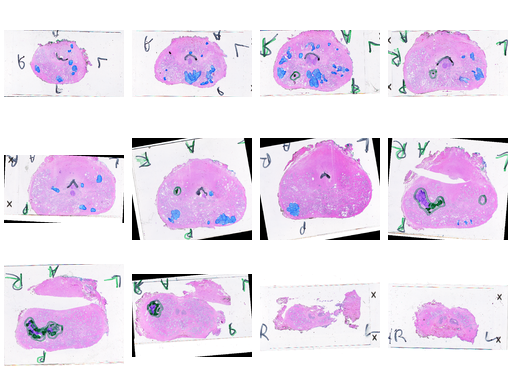

In [31]:
for i in MRIatrophy:
    montage = '%s/Patient%s/Histology/Images/montage.png' % (invivo_path, i)
    print montage
    display(Image(filename=montage))

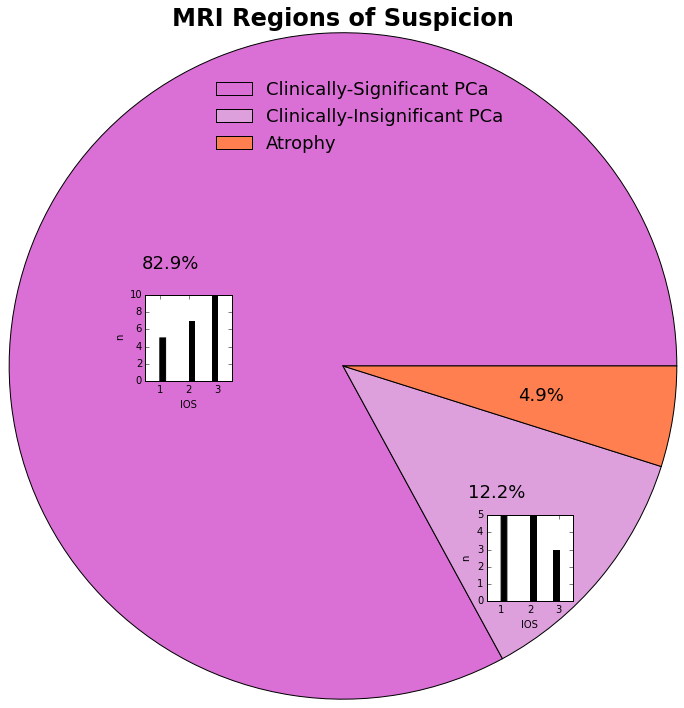

In [35]:
# lets make another pie chart for the MRI ROSs
labels = ['Clinically-Significant PCa', 'Clinically-Insignificant PCa', 'Atrophy']
ros_colors = {'paper': ['lightgray', 'darkgray', 'dimgray'],
              'presentation': ['orchid', 'plum', 'coral']
              }
colors = ros_colors[graphicsMode]

plt.figure(figsize=(12,12))
slices = [MRIclinsig.c, len(MRI_ClinInsigPCA), len(MRIatrophy)]
patches, texts, autotexts = plt.pie(slices, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('MRI Regions of Suspicion', fontsize=24, fontweight='bold')
for i in range(0,len(texts)):
    texts[i].set_fontsize(18)
for i in range(0,len(autotexts)):
    autotexts[i].set_fontsize(18)
plt.legend(patches, labels, fontsize=18, loc='upper center', frameon=False, bbox_to_anchor=(0.525, 0.95))

# TODO: IOS histogram in clin-sig and clin-insig slices
a = plt.axes([0.285, 0.495, 0.1, 0.1], axisbg='white')
n, b, p = hist(ClinSigMatchIOS, rwidth=2.0, color='black')
xlabel('IOS')
ylabel('n')
setp(a, xlim=(0.5, 3.5), ylim=(0, 10), xticks=[1, 2, 3])

a = plt.axes([0.680, 0.240, 0.1, 0.1], axisbg='white')
n, b, p = hist(ClinSigMissIOS, rwidth=2.0, color='black')
xlabel('IOS')
ylabel('n')
setp(a, xlim=(0.5, 3.5), ylim=(0, 5), xticks=[1, 2, 3])

savefig('MRI_ROS.%s' % saveFigType[graphicsMode], dpi=600)

##Clinically-Significant Histology Lesions

No Histology Index Lesion, P70
44/67 (66%) of clinically-significant histology lesions were detected
	Locations: 53/67 (79%) posterior, 14/67 (21%) anterior
	37/53 (70%) of posterior clinically-significant lesions MRI-detected
	7/14 (50%) of anterior clinically-significant lesions MRI-detected


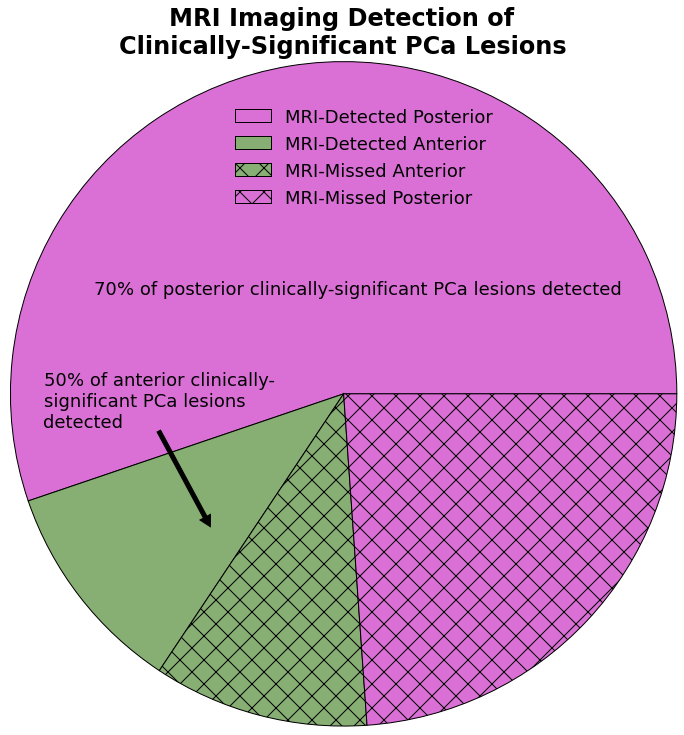

In [41]:
ClinSigDetected = []

for p in ValidPatientNums:
    P = MRAnalysis(p, invivo_path)
    if P.clin_sig_sensitivity:
        ClinSigDetected.append(P.clin_sig_sensitivity)
       
histtotal = len([j for i in ClinSigDetected for j in i])      
histclinsig = countTotalPercent(len([j for i in ClinSigDetected for j in i if j[0]]), histtotal)                  
histposterior = countTotalPercent(len([j for i in ClinSigDetected for j in i if j[1] == 'posterior']), histtotal)  
histanterior = countTotalPercent(len([j for i in ClinSigDetected for j in i if j[1] == 'anterior']), histtotal)
histPosteriorMatch = countTotalPercent(len([j for i in ClinSigDetected for j in i if j[0] and j[1] == 'posterior']), histposterior.c)
histAnteriorMatch = countTotalPercent(len([j for i in ClinSigDetected for j in i if j[0] and j[1] == 'anterior']), histanterior.c)
        
print "%i/%i (%.f%%) of clinically-significant histology lesions were detected" % (histclinsig.c, histclinsig.t, histclinsig.p)
write_analysis_result('histClinSigDetect', histclinsig.p)
print "\tLocations: %i/%i (%.f%%) posterior, %i/%i (%.f%%) anterior" % \
    (histposterior.c, histposterior.t, histposterior.p,histanterior.c, histanterior.t, histanterior.p)
write_analysis_result('histClinSigDetectPosterior', histposterior.p)
write_analysis_result('histClinSigDetectAnterior', histanterior.p)
print "\t%i/%i (%.f%%) of posterior clinically-significant lesions MRI-detected" % (histPosteriorMatch.c, histPosteriorMatch.t, histPosteriorMatch.p)
print "\t%i/%i (%.f%%) of anterior clinically-significant lesions MRI-detected" % (histAnteriorMatch.c, histAnteriorMatch.t, histAnteriorMatch.p)
write_analysis_result('histPosteriorMatch', histPosteriorMatch.p)
write_analysis_result('histAnteriorMatch', histAnteriorMatch.p)

# lets make another pie chart for the clinically-significant lesions
labels = ['MRI-Detected Posterior', 'MRI-Detected Anterior', 'MRI-Missed Anterior', 'MRI-Missed Posterior']
colors = pie_colors[graphicsMode]

plt.figure(figsize=(12,12))
slices = [histPosteriorMatch.c, histAnteriorMatch.c, histAnteriorMatch.t-histAnteriorMatch.c, histPosteriorMatch.t-histPosteriorMatch.c]
patches, texts = plt.pie(slices, colors=colors)
plt.axis('equal')
plt.title('MRI Imaging Detection of\nClinically-Significant PCa Lesions', fontsize=24, fontweight='bold')
for i in range(0,len(texts)):
    texts[i].set_fontsize(18)
#for i in range(0,len(autotexts)):
#    autotexts[i].set_fontsize(18)    
patches[2].set_hatch('x')
patches[3].set_hatch('x')
plt.legend(patches, labels, fontsize=18, frameon=False, bbox_to_anchor=(0.75, 0.95))
#plt.text(-0.75, 0.4, '%.f%% of all clinically-significant PCa lesions detected' % histclinsig.p, fontsize=18, color='black')
plt.text(-0.75, 0.3, '%.f%% of posterior clinically-significant PCa lesions detected' % histPosteriorMatch.p, fontsize=18, color='black')
plt.annotate('%.f%% of anterior clinically-\nsignificant PCa lesions\ndetected' % histAnteriorMatch.p, 
             xy=(-0.4, -0.4),
             xytext=(-0.9,-0.1),
             fontsize=18, 
             arrowprops=dict(facecolor='black'))
savefig('HistClinSigDetection.%s' % saveFigType[graphicsMode], dpi=600)

In [10]:
analysis_results.close()

In [11]:
%%bash
cat analysis_results.tex

% DO NOT MANUALLY EDIT THIS FILE!
% GENERATED BY arfi_histology_lesion_analysis.ipynb
\newcommand{\arfiIndexSensitivity}{78.6}
\newcommand{\arfiPosteriorIndexSensitivity}{80.8}
\newcommand{\arfiAnteriorIndexSensitivity}{50.0}
\newcommand{\arfiClinSig}{81.5}
\newcommand{\arfiClinSigPosterior}{100.0}
\newcommand{\arfiClinSigAnterior}{0.0}
\newcommand{\arfiClinInsigPosterior}{100.0}
\newcommand{\arfiClinInsigAnterior}{0.0}
\newcommand{\histClinSigDetect}{68.6}
\newcommand{\histClinSigDetectPosterior}{85.7}
\newcommand{\histClinSigDetectAnterior}{14.3}
\newcommand{\histPosteriorMatch}{73.3}
\newcommand{\histAnteriorMatch}{40.0}
